In [98]:
# Importing the necessary libraries
import selenium
from selenium import webdriver as wb
import pandas as pd
import numpy as np
import datetime
import time
from datetime import date

In [99]:
# Chaning the working directory to the path where the chromedriver is saved & setting up the chrome driver
%cd "C:\\Users\\akshi\\OneDrive\\Desktop\\ISB\\Data Collection\\Assignment"
driver = wb.Chrome("C:\\Users\\akshi\\OneDrive\\Desktop\\ISB\\Data Collection\\Assignment\\chromedriver.exe")

C:\Users\akshi\OneDrive\Desktop\ISB\Data Collection\Assignment


In [100]:
month = [1,1,1,1,1,1,1]
month = [str(x).zfill(2) for x in month]
day = [4,5,6,7,8,9,10]
day = [str(x).zfill(2) for x in day]
year = [2021,2021,2021,2021,2021,2021,2021]
year = [str(x).zfill(4) for x in year]

In [101]:
# Creating an empty dataframe called 'Flight_Prices'
Flight_Prices = pd.DataFrame()

# Creating a for loop which will iterate through all the required pages of the website
for a,b,c in zip(day,month,year):
    driver.get("https://www.makemytrip.com/flight/search?tripType=O&itinerary=DEL-BOM-{}/{}/{}&paxType=A-1_C-0_I-0&cabinClass=E&sTime=1597828876664&forwardFlowRequired=true".format(a,b,c))
    time.sleep(15)
    
    lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
    match=False
    while(match==False):
        lastCount = lenOfPage
        time.sleep(1)
        lenOfPage = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var lenOfPage=document.body.scrollHeight;return lenOfPage;")
        if lastCount==lenOfPage:
            match=True
    
    time.sleep(60)
    # Extracting all the Airline names using xpath
    FlightName_elements = driver.find_elements_by_xpath("//div[@class='pull-left airways-info-sect']")
    FlightName_elements = [x.text for x in FlightName_elements]
    FlightName = [x.split('\n')[0] for x in FlightName_elements]
    FlightName = pd.Series(FlightName)
    
    # Extracting all the prices using xpath
    Price_elements = driver.find_elements_by_xpath("//span[@class='actual-price']")
    Price = [x.text for x in Price_elements]
    Price = [i for i in Price if i]
    #Price = Price.str.replace(",","").str.extract('(\d+)')
    Price = pd.Series(Price)
    
    # Extracting all the From City details using xpath
    Fromcity_elements = driver.find_elements_by_xpath("//p[@class='dept-city']")
    Fromcity = [x.text for x in Fromcity_elements]
    Fromcity = pd.Series(Fromcity)
    
    # Extracting all the To City details using xpath
    Tocity_elements = driver.find_elements_by_xpath("//p[@class='arrival-city']")
    Tocity = [x.text for x in Tocity_elements]
    Tocity = pd.Series(Tocity)
    
    # Extracting all the Duration details using xpath
    Duration_elements = driver.find_elements_by_xpath("//p[@class='fli-duration']")
    Duration = [x.text for x in Duration_elements]
    Duration = pd.Series(Duration)
    
     # Extracting all the Departure time details using xpath
    Deptime_elements = driver.find_elements_by_xpath("//div[@class='dept-time']")
    Deptime = [x.text for x in Deptime_elements]
    Deptime = pd.Series(Deptime)
    
     # Extracting all the Arrival Time details using xpath
    Arrtime_elements = driver.find_elements_by_xpath("//p[@class='reaching-time append_bottom3']")
    Arrtime = [x.text for x in Arrtime_elements]
    Arrtime = [x.split("+", 1)[0] for x in Arrtime]
    Arrtime = pd.Series(Arrtime)
    
    Date_elements = driver.find_elements_by_xpath("//div[@class='item blue_active']")
    Date_elements = [x.text for x in Date_elements]
    x = [x.split(',', 1)[1] for x in Date_elements]
    Date = [i.split('\n', 1)[0] for i in x]
    Date = pd.Series(Date)
            
    # Combining all the lists into a dataframe called 'df'
    df = pd.DataFrame({'Date':Date,"Airline":FlightName,"From City":Fromcity, "To City":Tocity, "Departure Time":Deptime,"Arrival Time":Arrtime,"Flight Duration":Duration,"Price":Price})
    
    # We will append the results obtained from every page into the empty datafram created earlier called 'Flight_Prices'
    Flight_Prices = Flight_Prices.append(df) 
        
Flight_Prices[Flight_Prices.Date==""] = np.NaN
Flight_Prices.Date = Flight_Prices.Date.fillna(method='ffill')
Flight_Prices.Price = Flight_Prices.Price.str.replace(",","").str.extract('(\d+)')
Flight_Prices

C:\Users\akshi\anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\akshi\anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\akshi\anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\akshi\anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
C:\Users\akshi\anaconda3\lib\site-packages\ipykernel_launche

,Date,Airline,From City,To City,Departure Time,Arrival Time,Flight Duration,Price
0,Jan 04,Go Air,New Delhi,Mumbai,06:00,08:05,02 hrs 05 mins,5002
1,Jan 04,Go Air,New Delhi,Mumbai,08:00,10:05,02 hrs 05 mins,5002
2,Jan 04,Spicejet,New Delhi,Mumbai,08:20,10:25,02 hrs 05 mins,5002
3,Jan 04,Go Air,New Delhi,Mumbai,18:40,20:45,02 hrs 05 mins,5002
0,Jan 06,Air India,New Delhi,Mumbai,22:15,00:30,02 hrs 15 mins,3955
1,Jan 06,Go Air,New Delhi,Mumbai,06:00,08:05,02 hrs 05 mins,5002
2,Jan 06,Go Air,New Delhi,Mumbai,08:00,10:05,02 hrs 05 mins,5002
3,Jan 06,Spicejet,New Delhi,Mumbai,08:20,10:25,02 hrs 05 mins,5002
0,Jan 07,Air India,New Delhi,Mumbai,22:15,00:30,02 hrs 15 mins,3955
1,Jan 07,Go Air,New Delhi,Mumbai,06:00,08:05,02 hrs 05 mins,5002


In [102]:
x = Flight_Prices

In [103]:
Flight_Prices = x

In [104]:
Flight_Prices = Flight_Prices[Flight_Prices['Price'].notna()]
Flight_Prices['Price'] = pd.to_numeric(Flight_Prices['Price'])

In [105]:
Flight_Prices = Flight_Prices[(Flight_Prices['Departure Time']>='15:00') & (Flight_Prices['Departure Time']<= '18:00')]
Flight_Prices

,Date,Airline,From City,To City,Departure Time,Arrival Time,Flight Duration,Price


In [106]:
Flight_Prices = Flight_Prices.loc[Flight_Prices.groupby('Date')['Price'].idxmin()]
Flight_Prices = Flight_Prices.drop_duplicates('Date')
Flight_Prices

,Date,Airline,From City,To City,Departure Time,Arrival Time,Flight Duration,Price


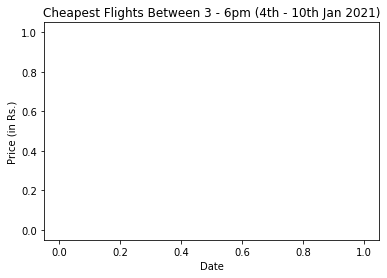

<Figure size 432x288 with 0 Axes>

In [107]:
import matplotlib.pyplot as plt

plt.plot(Flight_Prices.Date,Flight_Prices.Price)
plt.title('Cheapest Flights Between 3 - 6pm (4th - 10th Jan 2021)')
plt.xlabel('Date')
plt.ylabel('Price (in Rs.)')
plt.show()
plt.savefig('chart.png')